In [42]:
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go

In [43]:
df = pd.read_csv("results/px/costs.csv", names=["from", "to", "cost"])
df

,from,to,cost
0,grouped_bar,slope_chart,8.5
1,grouped_bar,stacked_bar,2.0
2,slope_chart,grouped_bar,11.0
3,slope_chart,stacked_bar,11.0
4,stacked_bar,grouped_bar,2.0
5,stacked_bar,slope_chart,8.5


In [47]:
square = df.pivot_table(index="from", columns="to", values="cost").fillna(0)
square

to,grouped_bar,slope_chart,stacked_bar
from,,,
grouped_bar,0.0,8.5,2.0
slope_chart,11.0,0.0,11.0
stacked_bar,2.0,8.5,0.0


In [56]:
(square.values+square.values.T)/2

array([[0.  , 9.75, 2.  ],
       [9.75, 0.  , 9.75],
       [2.  , 9.75, 0.  ]])

In [53]:
from sklearn.manifold import MDS
embedding = MDS(n_components=2, dissimilarity='precomputed')

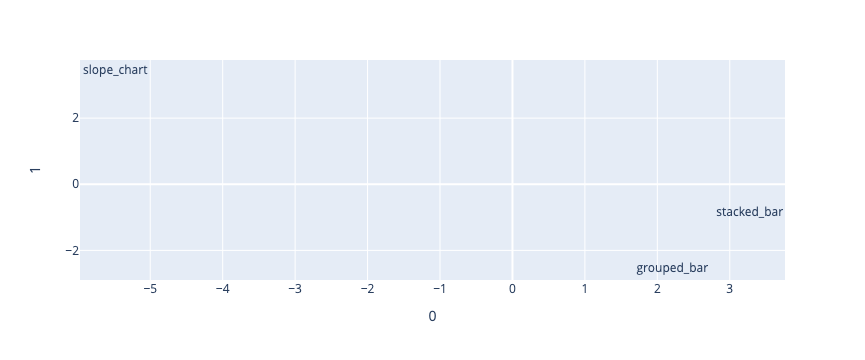

In [65]:
px.scatter(
    embedding.fit_transform((square.values+square.values.T)/2),
    x=0,y=1,text=square.index
).update_traces(mode="text")

In [18]:
order = list(df["from"].unique())

In [66]:
fig = go.FigureWidget(px.density_heatmap(df, x="from", y="to", z="cost", 
                   color_continuous_scale="reds", text_auto=True,
                   category_orders={"from":square.index, "to":square.index}))
fig

FigureWidget({
    'data': [{'coloraxis': 'coloraxis',
              'histfunc': 'sum',
              'hoverte…

In [41]:
def test(trace, points, state):
    with out:
        print("yooo")

fig.data[0].on_click(test)


In [38]:
import ipywidgets as widgets


In [39]:
out = widgets.Output(layout={'border': '1px solid black'})
out

Output(layout=Layout(border='1px solid black'))